<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/Child_Desease_project_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("kyphosis.csv")

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df= pd.DataFrame(df,columns=df.columns)

In [9]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


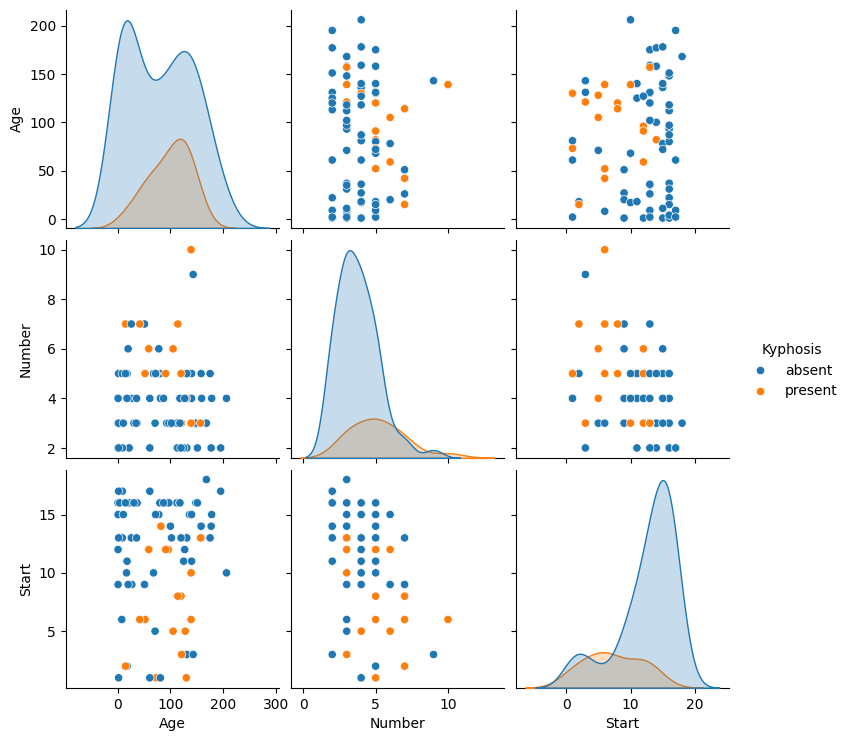

In [15]:
sns.pairplot(df,hue = 'Kyphosis')

<Axes: xlabel='count'>

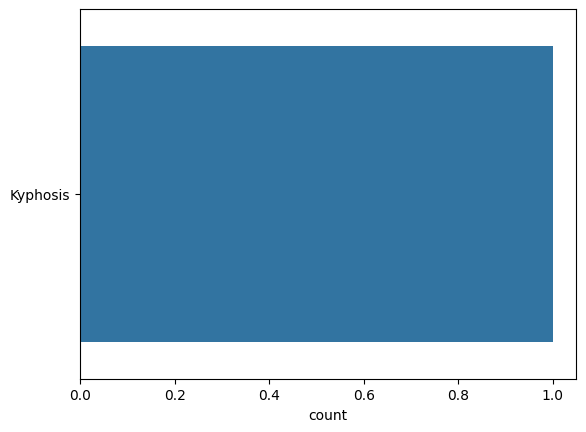

In [16]:
sns.countplot('Kyphosis')

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [22]:
y = df['Kyphosis']
x = df.drop('Kyphosis',axis=1)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state= 101)

# Training the model

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [30]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

#Prediction

In [38]:
y_predict = dtree.predict(x_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
confusion_matrix(y_test,y_predict)

array([[15,  2],
       [ 3,  5]])

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      absent       0.83      0.88      0.86        17
     present       0.71      0.62      0.67         8

    accuracy                           0.80        25
   macro avg       0.77      0.75      0.76        25
weighted avg       0.80      0.80      0.80        25



In [46]:

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

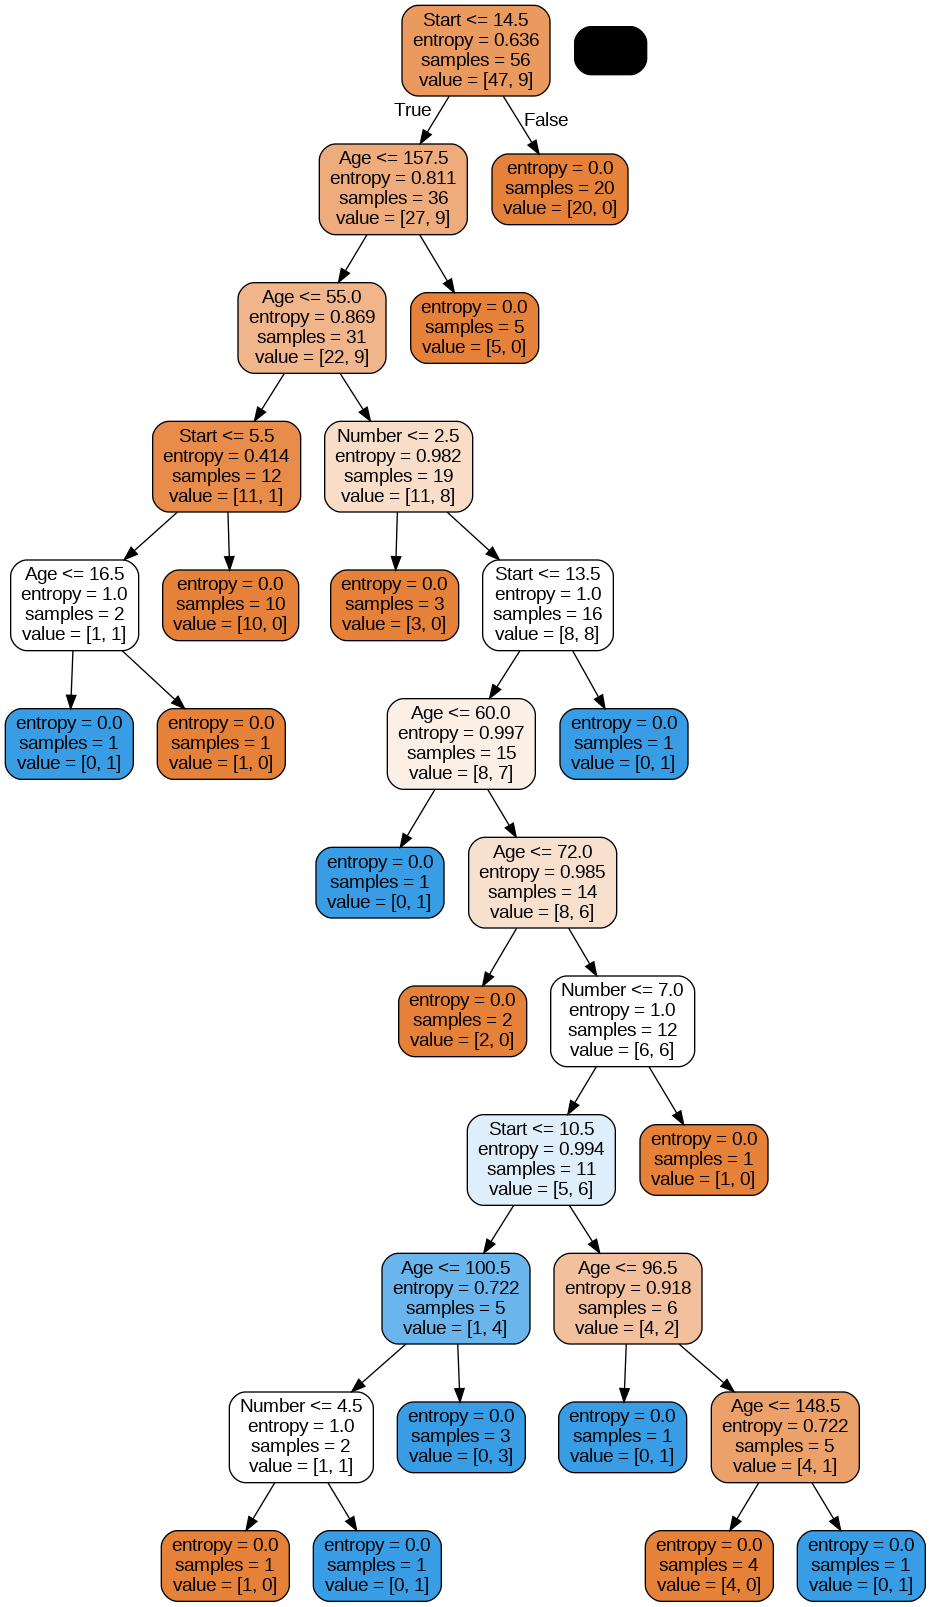

In [48]:
dot_data = StringIO()
export_graphviz(dtree,out_file= dot_data,feature_names= features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())